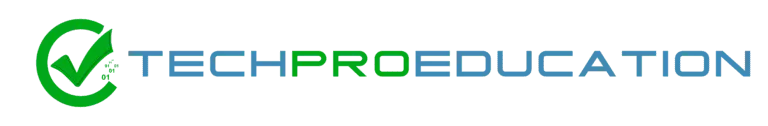

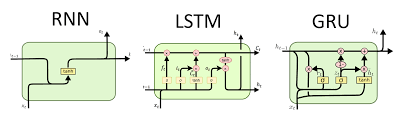

# RNN Syntax Basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Creating Data

We will create our data (sequence) ourselves. We determined 501 numbers between 0 and 500 using __linspace__. We took the sine values of these points and assigned these values to y.

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

The maximum value of the sine function is 1, and the minimum value is -1.

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

Our goal is to forecast by predicting the next values of the dataset.

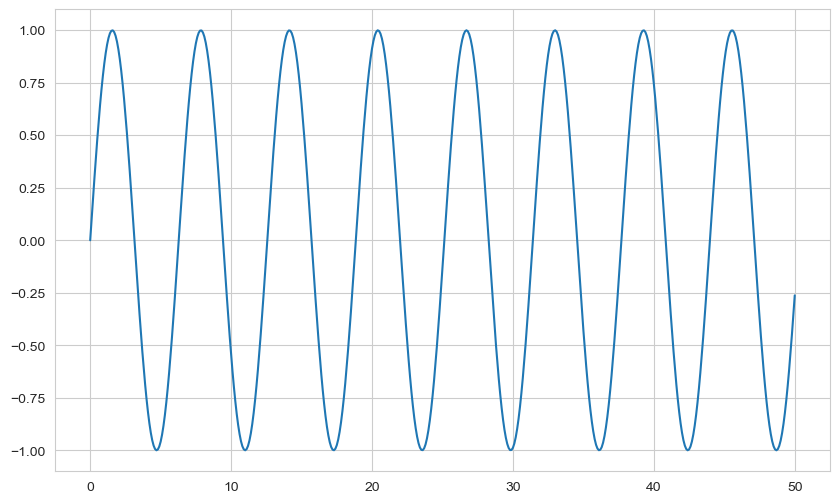

In [5]:
plt.plot(x,y);

Let's turn this into a DataFrame

In [6]:
df = pd.DataFrame(index=x, data=y, columns=['Sine'])

a DF with one feature created:

The variable 'x' represents the data used as the index, while the variable 'y' represents the data used as the 'Sine' column. This code aims to create a DataFrame by using the 'y' data under the column name 'Sine' and the 'x' data as the index.

In [7]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


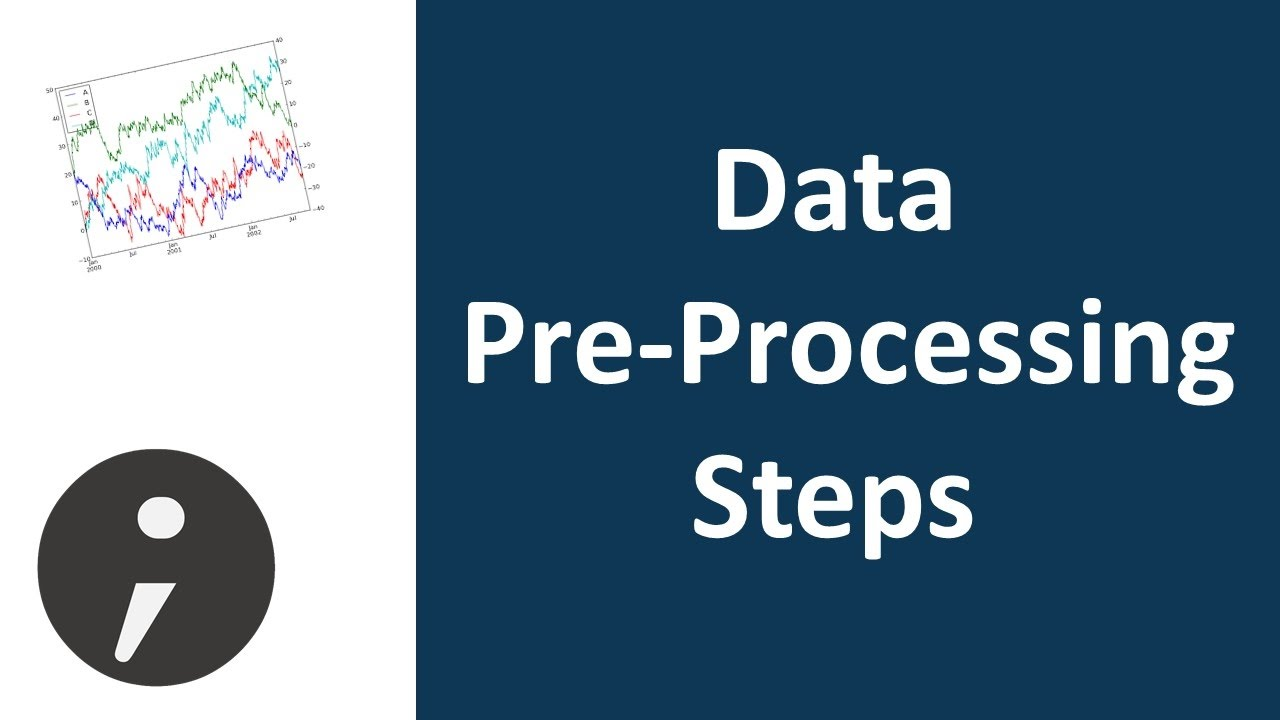

## Preprocessing of Data

### Train Test Split

In [8]:
len(df)

501

Until now, we were performing a random split when separating the test and train data. However, here we will not split the data randomly because the order of our data is important. Therefore, we will separate a certain portion from the end of our data as the test data.

In [9]:
test_percent = 0.15

The 15% portion corresponds to the 75th index in our dataset.

In [10]:
len(df)*test_percent

75.14999999999999

To eliminate the decimal, we used round and assigned the length of the data up to the 75th index to a variable.

In [11]:
test_point = np.round(len(df)*test_percent)
test_point

75.0

If we subtract this value from the actual length of the DataFrame, we are left with the data that will be used for the training portion. The data up to the 426th index will be the training data, and the rest will be the test data.

In [12]:
test_ind = int(len(df) - test_point)
test_ind

426

We took the part up to the `test_ind` as the training data, and the part after `test_ind` as the test data.

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

This code example is used to split a DataFrame into two parts. Here is a detailed explanation of each line:

1. **`train = df.iloc[:test_ind]`:**  
   This line is used to split the DataFrame into two parts and create two separate DataFrames: one for the training data (`train`) and one for the test data (`test`).

   - **`df`**: This is the name or variable of the DataFrame, in this case, "df."
   - **`.iloc[]`**: In Pandas, the `.iloc[]` indexer is used to select specific rows and columns. This indexer selects data based on row and column indices.
   - **`[:test_ind]`**: This expression specifies which rows to select. Here, a variable or integer called `test_ind` is used, and the data is split based on the value of this variable. The colon `:` operator selects all rows from the beginning up to the specified index (`test_ind`).
   
   Therefore, the line **`train = df.iloc[:test_ind]`** selects all the rows from the beginning of the DataFrame (`df`) up to the `test_ind` index and assigns them to a new DataFrame called `train`. This forms the DataFrame that contains the training data.

2. **`test = df.iloc[test_ind:]`:**  
   This line selects all the rows from the `test_ind` index onwards and assigns them to a new DataFrame called `test`. This forms the DataFrame that contains the test data.

In conclusion, this code example splits the DataFrame into two separate parts: training and test data. The `train` DataFrame contains the training data, and the `test` DataFrame contains the test data. This is a common procedure in machine learning, where the training data is used to train a model, and the test data is used to evaluate the model's performance.

In [14]:
train

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
42.100,-0.952
42.200,-0.978
42.300,-0.994
42.400,-1.000


In [15]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


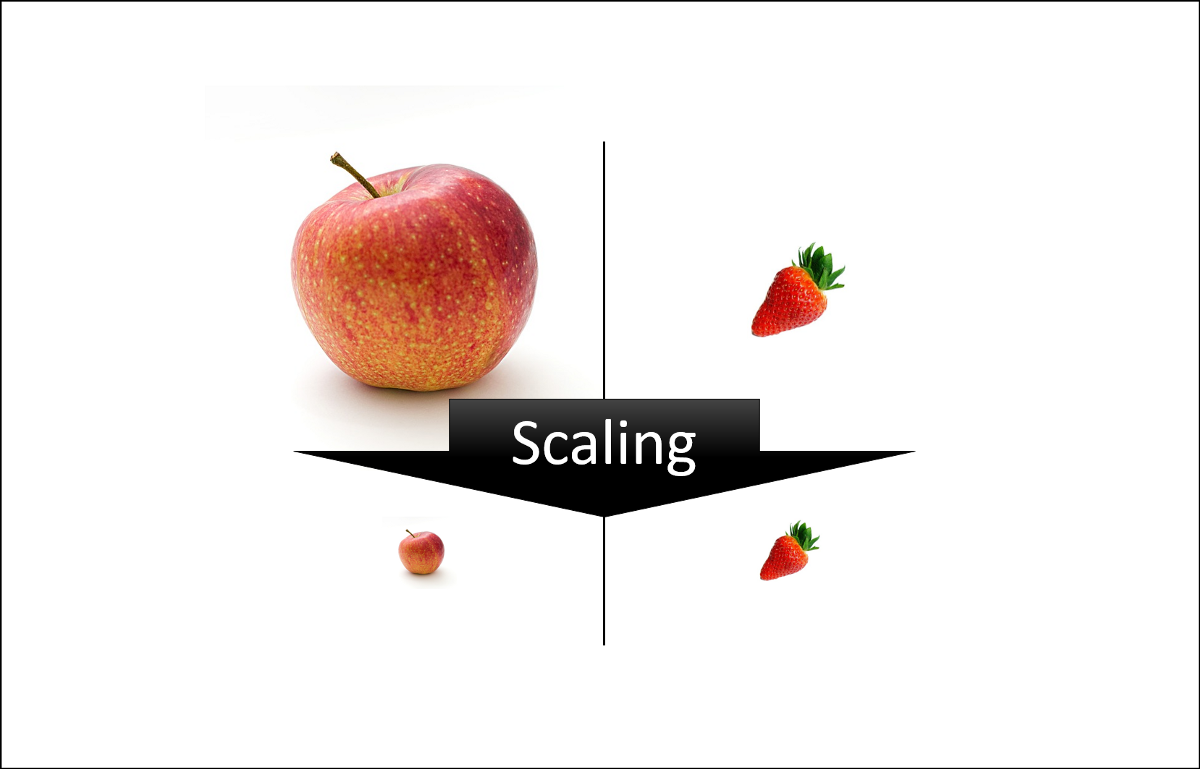

## Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [19]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

In [20]:
test_scaled[:10]

array([[0.00885189],
       [0.02065929],
       [0.0372561 ],
       [0.05847648],
       [0.08410841],
       [0.11389578],
       [0.14754097],
       [0.1847078 ],
       [0.22502492],
       [0.2680895 ]])

## Time Series Generator

The `TimeseriesGenerator` is a tool in machine learning, specifically in Keras, that helps you prepare time series data for training models. Imagine you have a sequence of data points (like daily temperatures or stock prices over time), and you want to predict future values based on past ones. However, you can't just feed raw data into a model; it needs to be structured into smaller chunks, or windows, of past data.

Here's what the `TimeseriesGenerator` does in simple terms:

1. **Breaks up data into sequences:** It takes your big series of data and splits it into smaller, overlapping sequences (or chunks). Each chunk includes a certain number of past points (the "input") and a future point (the "target").
   
2. **Creates inputs and outputs:** From those chunks, it generates inputs (what you use to make predictions) and outputs (the values you're trying to predict). For example, if you have a week’s worth of temperature data, it might give the model 6 days of data to predict the 7th day.

3. **Automates the process:** Instead of manually splitting and organizing your data, the `TimeseriesGenerator` automates this for you, making it easier and faster to prepare data for training.

In short, `TimeseriesGenerator` simplifies the preparation of time series data for models, helping you turn historical data into useful inputs and outputs for prediction tasks.

The `TimeSeriesGenerator` does not modify the actual data. This class is used to divide time series data into structured data groups and feed these groups into a training or forecasting model. It applies a sliding window or look-back approach to the data, but it does not alter the original dataset.

Thus, when using `TimeSeriesGenerator`, your original dataset remains unchanged and intact. The class is primarily used to reshape the data into a format that is more suitable for the model, enabling the model to perform better by utilizing the structured input without altering the core data.

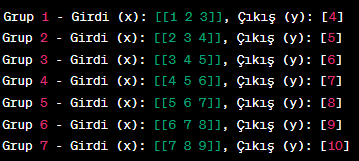

However, you can work with time series data without using the `TimeSeriesGenerator`. In this case, you would need to manually split and arrange the data. This would require performing custom processing to convert the data into a suitable input-output format.

The advantage of using `TimeSeriesGenerator` is that it automates these processes and allows you to feed time series data into your model more easily and efficiently. However, if your dataset has specific requirements or if you prefer more control over the data processing, you can opt for manual data handling methods.

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

We used the __train_scaled__ data as __data__ and __targets__ inside the Generator. Because in RNN, the feature used for prediction and the target label are the same feature.

__length=3 -->__ the length of the sequences. "Predict the 4th based on the information from 3 rows."

__batch_size -->__ 'How many data points will there be in a batch according to the condition above?' Here, we did it one by one, but it's not possible to do this with large datasets. (It is recommended to do it one by one if possible.)

__stride=1 -->__ After the first 2 data points, the 3rd will be predicted; then, by shifting one step, the 4th will be predicted based on the 2nd and 3rd. This process will continue until the end.

In [22]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.legacy.preprocessing.sequence:

class TimeseriesGenerator(keras.src.trainers.data_adapters.py_dataset_adapter.PyDataset)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  DEPRECATED.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Le

In [23]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
stride = 1 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,                   # training data
                                targets = train_scaled,                
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

__length = 2__: Determines the length of each output sequence. In other words, each batch will consist of 2 time steps. For example, a time series sequence like [1, 2].

__batch size = 1__: Determines how many time series samples will be in each group (batch). In this case, each group will contain only 1 sample.

__stride = 1__: Determines the period (step) between consecutive output sequences. This controls how frequently new output sequences will be created. 1 means a new output sequence will be created at every step.

In [24]:
len(train_scaled)

426

In [25]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 
# 426-2/1x1

424

Even though the scaled data consists of 426 points, the Generator created 424 data points. Since __length=2__, after the last two values of the dataset, there is no data left to make predictions. Therefore, the last two rows cannot be used. The number of generators is calculated with the formula:  
__len(generator) = (len(train) - length) / (batch_size * stride)__.

In [26]:
generator

The Generator provided the t_train and y_train values at index 0. In x_train, due to the length, there are 2 values. Based on these two values, the 3rd value will be predicted.

In [27]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [28]:
# What does the first batch look like?
X, y = generator[0]

We assigned the Generator to X and y to see it more clearly. Then, we printed it. We can see the provided arrays and the 3rd row that needs to be predicted.

In [29]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]]
Predict this y: 
[[0.59933458]]


We can also see the first 3 values below in the train_scaled data.

In [30]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

We changed the parameter values below and compared the difference with the previous ones.

In [31]:
# define generator
length = 3 # Length of the output sequences (in number of timesteps)
batch_size = 2 # Number of timeseries samples in each batch
stride = 2 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,                  
                                targets = train_scaled,                 
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [32]:
len(train_scaled)

426

In [33]:
len(generator)     # (len(train)-lenght)/(batch_size*stride) 

106

It generated 106 generators.  
The calculation is: (426 - 3) / (2 * 2) = 106.

In [34]:
generator

It will predict the value 0.64776041 from the first group of three and the value 0.73971381 from the next group of three.

In [35]:
generator[0]

(array([[[0.49999912],
         [0.54991622],
         [0.59933458]],
 
        [[0.59933458],
         [0.64776041],
         [0.69470985]]]),
 array([[0.64776041],
        [0.73971381]]))

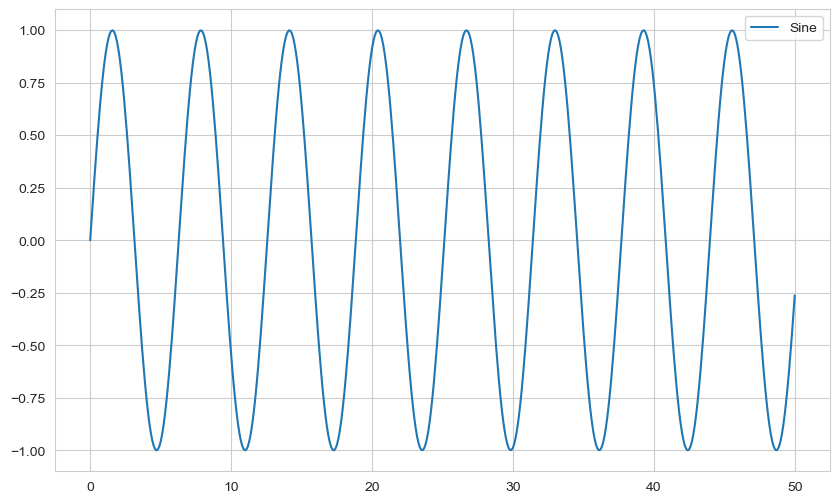

In [36]:
df.plot();

The more length the more training time

__How should the length value be calculated?__: We need to obtain a repeating period. Our first value starts from 0, so when it returns to 0 again, a period is completed. There are 501 points in the data, and based on this, if we calculate, we find that the first period completes at point 64. We can say that there is a repeating period every 64 points. We created the generator by selecting batch_size=1.

In [37]:
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [38]:
# What does the first batch look like?
X, y = generator[0]

426 - 64 = 362 generators :

In [39]:
len(generator)

362

64 data is given to the model, and the 65th data point will be predicted :

In [40]:
print(f'Given the Array: \n{X.flatten()}')    # we flattened it to see all the values. 
print(f'Predict this y: \n{y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

## Modelling

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [42]:
# We're only using one feature in our time series
n_features = 1

In [43]:
seed = 42

Added only one hidden layer to the Model. 

__units= 128 -->__ 128 neurons in the hidden layer

__input_shape=(length, n_features)) -->__ The first element gives the number of rows, and the second element gives the number of columns. Here, length=64 represents the number of rows, and n_features=1 represents the number of columns.

n_features typically does not include the target column. This value only represents how many features exist at each time step in the model's input data. The target column represents the model's output and is usually not considered part of the input data.

So, if the n_features value is 3, it means that there are 3 features at each time step. For example, in a weather forecasting model, these 3 features could be temperature, humidity, and wind speed. The target column, on the other hand, contains the values you want to predict, such as the future hourly temperature.

__model.add(Dense(units = 1)) -->__ only one neuron in the output layer as it is a regression problem.

RNN (Recurrent Neural Network) models typically use the loss metric instead of the accuracy metric. This is because RNN models are often used on datasets with continuous values, such as time series data.

The accuracy metric is generally used for classification problems, while RNN models are more commonly applied to regression problems. In regression problems, the target variables are continuous numerical values, and the goal is to predict these values directly. Therefore, loss metrics like MSE (Mean Squared Error) or RMSE (Root Mean Squared Error) are typically used instead of accuracy.

Both the Hyperbolic Tangent (tanh) and ReLU (Rectified Linear Unit) activation functions can be used in recurrent neural networks (RNNs).

The **tanh** function is commonly used in RNNs. It limits the input values between -1 and 1, producing negative outputs for negative input values and positive outputs for positive inputs. This makes it a suitable choice for managing the range of hidden states in RNNs, as it ensures the values remain within a controlled range, which can help in stabilizing the learning process.

The **ReLU** function can also be applied in RNNs. ReLU outputs the input value directly if it is greater than 0, and returns 0 for negative input values. The advantages of ReLU include its computational efficiency and the ability to propagate gradients more effectively, which can help mitigate the vanishing gradient problem in deep networks.

Which activation function you use depends on the problem you are solving and the characteristics of your dataset. Both functions may be appropriate in different scenarios, so it's often beneficial to experiment with both tanh and ReLU in your RNNs to determine which one yields better results for your specific task.

In [44]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 128, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))   

model.compile(optimizer='adam', loss='mse')

The __input_shape__ parameter specifies the dimensions of the input data. The __length__ represents the number of time steps in the input sequence, while __n_features__ refers to the number of features used at each time step.

There are a lot of parameters in the hidden layer. If we had built an ANN model, there would have been significantly fewer parameters. (If we had used LSTM instead of Simple RNN, we would have 4 times the parameters due to the 4 gates.)

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.fit(generator, epochs = 6)

Epoch 1/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0800
Epoch 2/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5698e-04
Epoch 3/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.7423e-04
Epoch 4/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0277e-04
Epoch 5/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.7155e-04
Epoch 6/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1288e-05


Since we don't have validation data, we can't determine whether there is overfitting or not.

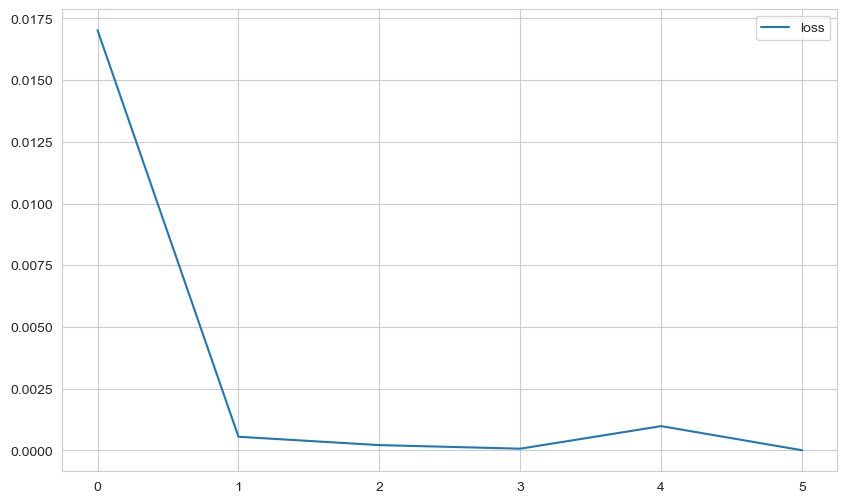

In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

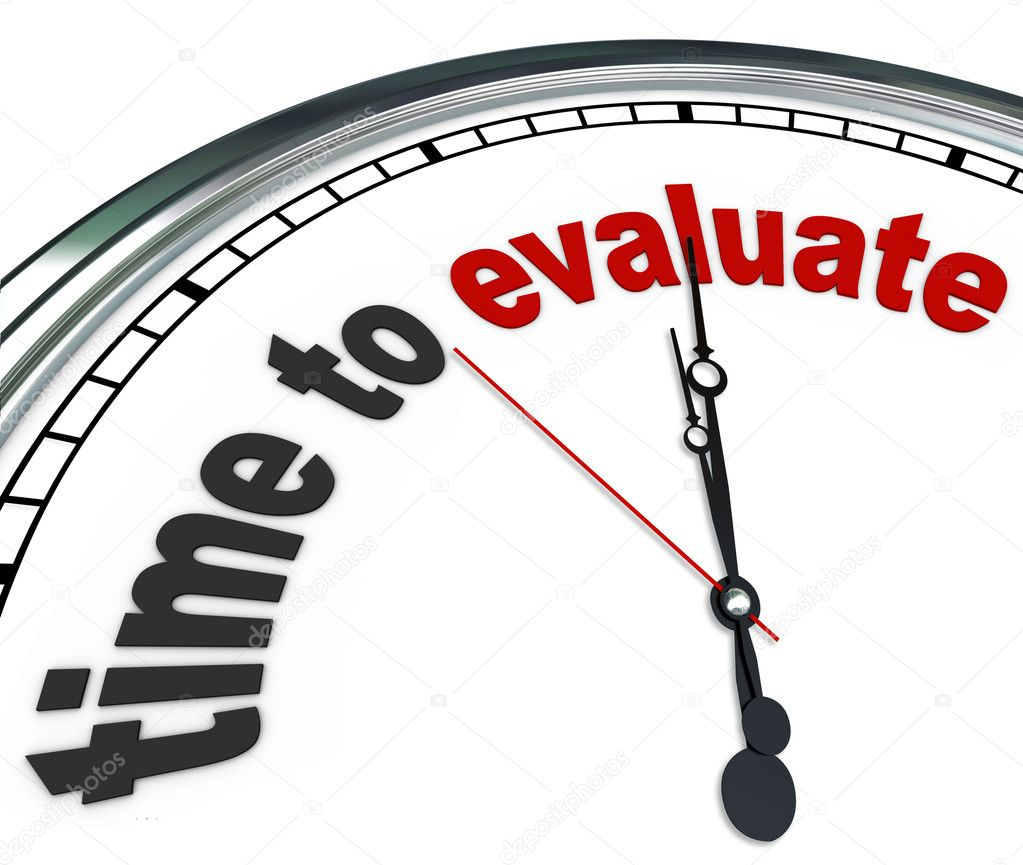

## Evaluate on Test Data

To evaluate the data, we need to make a forecast on the training data.

We will take the last part of the data, corresponding to our __length__, and attempt to predict the next step based on this data. We will then add our prediction to the data, shift the sequence one step forward, and try to predict the following step. By continuously adding new predictions to the end, we will predict the next steps in sequence, moving forward as many steps as we need. (It is recommended to perform forecasting for a number of steps equal to the length.) Since our dataset is simple, we can extend the forecasting process.

In [48]:
first_eval_batch = train_scaled[-length:]

We took the data from the end, covering the last __length__ (the last 64 values).

In [49]:
first_eval_batch.shape

(64, 1)

The shape of the data is (64, 1), but the model expects a shape of (1, 64, 1), meaning it needs to be 3-dimensional.

In [50]:
generator[0][0].shape

(1, 64, 1)

1. **Sample Count (Batch Size)**: The first dimension represents the number of samples used during training and prediction. This means you can have multiple time series examples or data samples.

2. **Time Steps (Sequence Length)**: The second dimension represents the length of each time series or the window size. Each time step contains a single data point, typically covering sequential time steps.

3. **Features**: The third dimension represents the number of features at each time step. Time series data often contain multiple features (e.g., temperature, humidity, pressure, etc.).

This 3-dimensional data structure allows RNN models to process sequential data, like time series, effectively. The model handles a data window for each time step that includes every feature and tries to capture relationships across sequential time steps.

In summary, RNN models expect 3D input data because it is a structure that properly represents sequential data, like time series, and helps the model capture temporal relationships more effectively.

There are two ways of changing the dimension; first, by adding 1 at the beginning of it we can convert it, second we can use __expand_dim__ function:

In [51]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))
# first_eval_batch = np.expand_dims(first_eval_batch, axis=0)

In [52]:
first_eval_batch.shape

(1, 64, 1)

We can now provide the reshaped data to the model for prediction. The model will use the 64 values from the data to predict what the 65th value will be.

In [53]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[0.0101108]], dtype=float32)

We will compare the prediction we found with the first element of the test data. The model made a prediction close to this actual value. The prediction is a 2-dimensional array.

In [54]:
test_scaled[0]

array([0.00885189])

In [55]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

__In summary__; we created an empty set called `test_prediction`. We will store the predictions we make into this empty set. We assigned the last `length` amount of data from the training dataset to the `first_eval_batch` variable, and we reshaped it from 2 dimensions to 3 dimensions. We will define these inside the following `for` loop:

In [56]:
current_batch.shape

(1, 64, 1)

In [57]:
current_batch    # 64

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [58]:
np.append(current_batch[:,1:,:], [[[0.0085]]], axis = 1)

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

Earlier, we made our model predict the 65th value (0.0085) based on 64 values. We removed the first value and added the 65th predicted value to the end using the __np.append__ method.

The __np.append__ method requires an array, the prediction value to be appended to the array, and information about which axis the value should be appended to.

__current_batch[:,1:,:] -->__ The part where we write 1 refers to the row index. By changing this part, we instructed it to start the index from 1 instead of 0. (The final dot refers to the number of columns). After this operation, the number of rows dropped to 63. We then appended the newly found prediction value by converting it to 3 dimensions. In this way, the sample count was completed back to 64.

### Final For Loop to predict step by step 

We will perform the same process described above in a for loop for the 75 test data points. We placed the same code we wrote earlier inside the for loop. During each iteration, the model will make a prediction, and the prediction will be added to the previously defined empty list. Finally, the `current_batch` will be updated by appending the new prediction and removing the first sample. We will then compare the forecast results with the test data.

In [59]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

The predictions made during the forecasting process are:

In [60]:
predictions_scaled

[array([0.0101108], dtype=float32),
 array([0.02178533], dtype=float32),
 array([0.03871438], dtype=float32),
 array([0.06032603], dtype=float32),
 array([0.08613323], dtype=float32),
 array([0.11606859], dtype=float32),
 array([0.14974096], dtype=float32),
 array([0.18678768], dtype=float32),
 array([0.22706272], dtype=float32),
 array([0.26991934], dtype=float32),
 array([0.31532815], dtype=float32),
 array([0.3625045], dtype=float32),
 array([0.4112453], dtype=float32),
 array([0.46142828], dtype=float32),
 array([0.5116282], dtype=float32),
 array([0.5623125], dtype=float32),
 array([0.61246276], dtype=float32),
 array([0.66167253], dtype=float32),
 array([0.7092118], dtype=float32),
 array([0.7550425], dtype=float32),
 array([0.79838705], dtype=float32),
 array([0.83880293], dtype=float32),
 array([0.8758337], dtype=float32),
 array([0.9092024], dtype=float32),
 array([0.9383651], dtype=float32),
 array([0.9633011], dtype=float32),
 array([0.98326916], dtype=float32),
 array([0.99

Actual Values in test data :

In [61]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing

Before comparing the actual values with the predictions, we transformed the predicted values back to their original scale using __inverse_transform__, so that we can make an accurate comparison.

This code line performs a transformation that helps revert scaled predictions back to their original scale. This process is particularly useful when scaling has been applied to the data, and predictions need to be returned to the original data range for comparison.

**Explanations:**

- **predictions**: This variable contains the scaled version of the predicted values, meaning these predictions were obtained after a certain scaling operation was applied.
  
- **scaler**: This represents the scaling object used for the transformation. When scaling methods like Min-Max scaling or Standardization are applied, this object performs the data transformation.

- **inverse_transform()**: This method is used to revert the scaled data back to its original data range. In other words, it converts the predictions from their scaled form to their original values.

In conclusion, the prediction values in the `predictions` variable are reverted from their scaled form back to their original data range using the `scaler` object. This allows the predictions to be compared with the actual values or to make the results more meaningful. This process ensures that the predictions align with the original data scale.

In [62]:
predictions = scaler.inverse_transform(predictions_scaled)

In [63]:
predictions

array([[-0.97976876],
       [-0.9564199 ],
       [-0.92256208],
       [-0.87933912],
       [-0.82772514],
       [-0.76785488],
       [-0.70051068],
       [-0.62641785],
       [-0.54586842],
       [-0.46015587],
       [-0.36933897],
       [-0.274987  ],
       [-0.17750623],
       [-0.07714104],
       [ 0.023258  ],
       [ 0.12462574],
       [ 0.22492548],
       [ 0.32334424],
       [ 0.41842206],
       [ 0.51008266],
       [ 0.59677108],
       [ 0.6776022 ],
       [ 0.75166312],
       [ 0.81839999],
       [ 0.87672494],
       [ 0.92659658],
       [ 0.96653232],
       [ 0.99673423],
       [ 1.01675706],
       [ 1.02620169],
       [ 1.02527592],
       [ 1.01373489],
       [ 0.9921825 ],
       [ 0.96065809],
       [ 0.91959976],
       [ 0.8696839 ],
       [ 0.81126573],
       [ 0.74509164],
       [ 0.67197318],
       [ 0.59234774],
       [ 0.50721439],
       [ 0.41742465],
       [ 0.32359803],
       [ 0.226762  ],
       [ 0.12771645],
       [ 0

In [64]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


In [65]:
test['RNN_Predictions'] = predictions

In [66]:
test

,Sine,RNN_Predictions
42.600,-0.982,-0.980
42.700,-0.959,-0.956
42.800,-0.925,-0.923
42.900,-0.883,-0.879
43.000,-0.832,-0.828
...,...,...
49.600,-0.617,-0.603
49.700,-0.536,-0.522
49.800,-0.449,-0.436
49.900,-0.357,-0.345


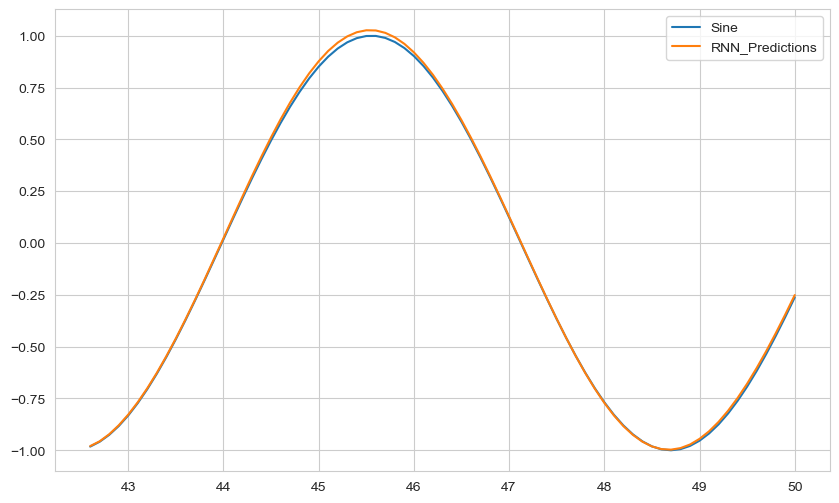

In [67]:
test.plot();

In [68]:
# The period was 64, but since my test data consists of 75 values, the output above represents more than one complete period.

## Retrain and Forecasting

After evaluating the model's performance, we will build the model using the entire dataset and perform the forecast. We applied the scaling process to the entire dataset.

In [69]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

We provided the entire dataset to the data and target sections within the TimeseriesGenerator. The length and batch_size values were set the same as in the training process.

In [70]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

We built our model with the same parameters as the last LSTM model we created. The only change was reducing the number of epochs to 6 because the model had completed training in 5 epochs previously. Since we don't have validation data, we couldn't use EarlyStopping. Therefore, we completed the training by setting 6 epochs.

In [71]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 128, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))   

model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs = 6)

Epoch 1/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0471
Epoch 2/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.3909e-05
Epoch 3/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.6230e-06
Epoch 4/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0139e-04
Epoch 5/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.0487e-04
Epoch 6/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.8963e-05


The length of the forecast we will make will be equal to the length, which is 64. We won’t be able to compare the forecast results with anything. We will simply append the predictions to the continuation of the original dataframe and visualize them.

In [72]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

This code is used to apply a time series forecasting model and predict future values. The process happens in the following steps:

1. An empty list called `forecast` is created, which will be used to store future predicted values.

2. It is assumed that a dataset called `scaled_full_data` contains the time series on which predictions will be made.

3. The variable `first_eval_batch` creates a data slice of a certain length (`length`) from the end of the `scaled_full_data` dataset. This slice will be used for the model's first prediction.

4. The variable `current_batch` reshapes the `first_eval_batch` into a batch format, representing the input data the model will use for predictions.

5. Using a loop, predictions are calculated. At each step, the following occurs:

   - The model calculates the predicted value for the next time step based on the current data slice using `model.predict(current_batch)`.
   - This predicted value is appended to the `forecast` list.
   - The `current_batch` is updated to include the new prediction and discard the first value, updating the data slice.
   
This loop generates a sequence of predictions, storing them in the `forecast` list. As a result, the code calculates the model's predictions starting from the last time step in the data and stores these predictions, forming a prediction series that can be used to forecast future values.

In [73]:
forecast = scaler.inverse_transform(forecast)

In [74]:
forecast

array([[-0.16294237],
       [-0.0622614 ],
       [ 0.03985538],
       [ 0.14166037],
       [ 0.24248916],
       [ 0.34117304],
       [ 0.43638533],
       [ 0.52715985],
       [ 0.61253138],
       [ 0.691425  ],
       [ 0.76327055],
       [ 0.826777  ],
       [ 0.88157743],
       [ 0.92694621],
       [ 0.96262217],
       [ 0.98837486],
       [ 1.00387135],
       [ 1.0089017 ],
       [ 1.00383654],
       [ 0.98867575],
       [ 0.96391105],
       [ 0.92977491],
       [ 0.88663365],
       [ 0.83535893],
       [ 0.77628095],
       [ 0.71023774],
       [ 0.63771557],
       [ 0.55959441],
       [ 0.47661623],
       [ 0.38954551],
       [ 0.29904779],
       [ 0.20608675],
       [ 0.11127309],
       [ 0.01551733],
       [-0.08037546],
       [-0.17569176],
       [-0.26949519],
       [-0.3610913 ],
       [-0.44959222],
       [-0.53398621],
       [-0.6137949 ],
       [-0.68778591],
       [-0.75546253],
       [-0.81577754],
       [-0.86819052],
       [-0

In [75]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


<Axes: >

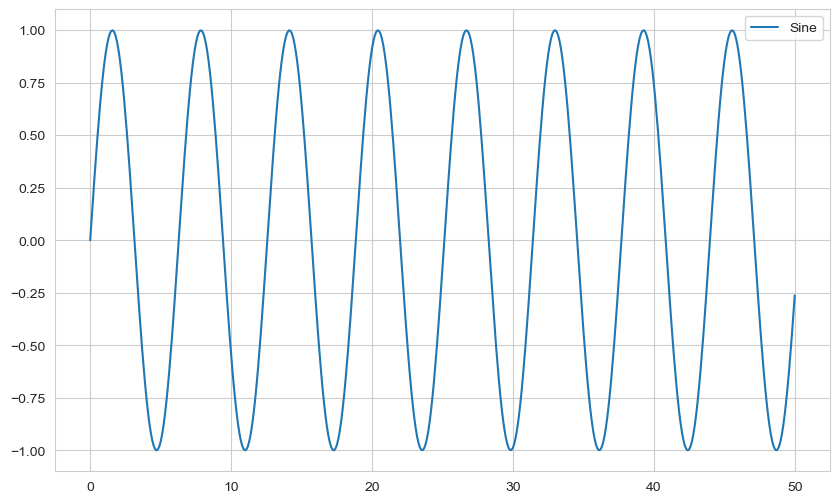

In [76]:
df.plot()

To visualize the predictions and the original dataframe, we need to create indices for the forecasts that match the dataframe. The indices in the dataframe increase in 0.1 steps and end at 50.00. The forecast should follow this sequence, starting from 50.1, 50.2, and so on.

In [77]:
forecast_len = len(forecast)
forecast_len

64

In [78]:
step = 0.1

In [79]:
forecast_len * step

6.4

The forecast index will start from 50.1, and a total of 6.4 will be added, bringing it to 56.5. The step will be 0.1. In this way, we created 64 indices and assigned them to a variable.

In [80]:
forecast_index = np.arange(50.1, 56.5, step = step)

In [81]:
len(forecast_index)

64

We generated a visual by plotting both together. We created a plot using the `df` index and `df` column, and another plot using the forecast index and forecast values. This allowed us to see the forecast predictions at the end of the data. (Different results may be obtained with each run.)

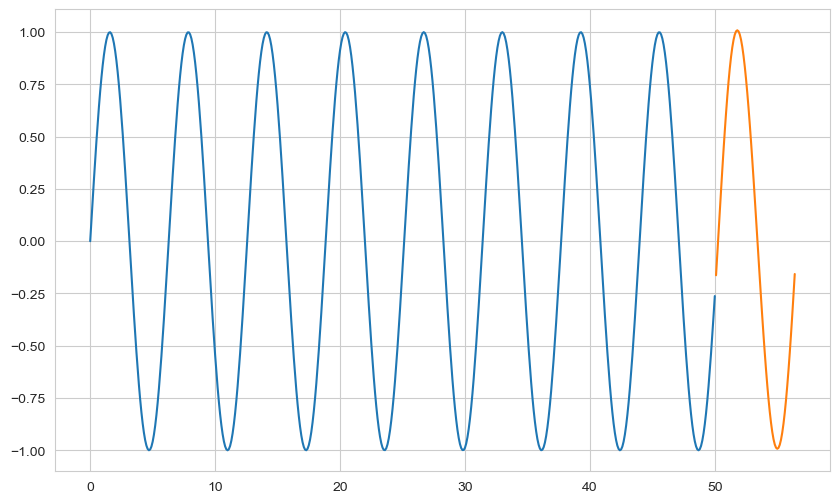

In [82]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast);

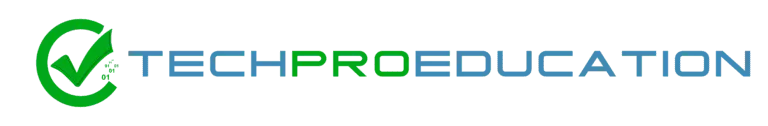